<a href="https://colab.research.google.com/github/Ritesh-develops/blinkit_data_analysis/blob/main/Blinkit_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA ANALYSIS PYTHON PROJECT**

Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Data

In [16]:
df = pd.read_csv("/content/drive/MyDrive/data analysis/Blinkit Analysis/blinkit_data.csv")

In [17]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


Data information

In [18]:
print("the size of data :", df.shape)

the size of data : (8523, 12)


In [19]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [20]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


Data Cleaning

In [21]:
print(df["Item Fat Content"].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [22]:
df["Item Fat Content"] = df['Item Fat Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular'})

In [23]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


# BUSINESS REQUIREMENTS

KPI's Requirements

In [24]:
#total sales
total_sales = df['Sales'].sum()

#avg sales
avg_sales = df['Sales'].mean()

#number of items sold
number_of_items_sold = df['Sales'].count()

#average ratings
avg_ratings = df['Rating'].mean()

KPIs ={'total sales': total_sales
       , 'avg sales' : avg_sales
       , 'number of items sold' : number_of_items_sold
       , 'avg ratings': avg_ratings}

#Display
for k,v in KPIs.items():
  print(f'{k} : {v:.1f}')



total sales : 1201681.5
avg sales : 141.0
number of items sold : 8523.0
avg ratings : 4.0


# CHARTS REQUIREMENTS

Total sales by Fat Content

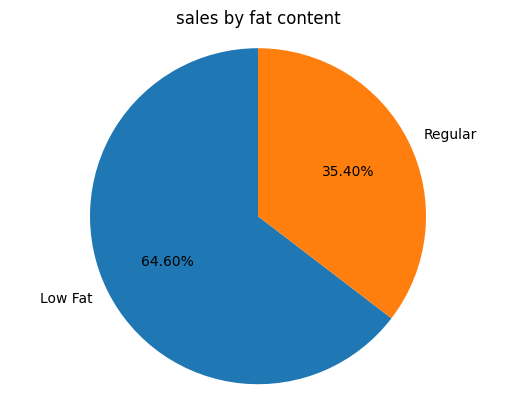

In [25]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels=sales_by_fat.index, autopct='%.2f%%', startangle=90)
plt.title('sales by fat content')
plt.axis('equal')
plt.show()

Total sales by items

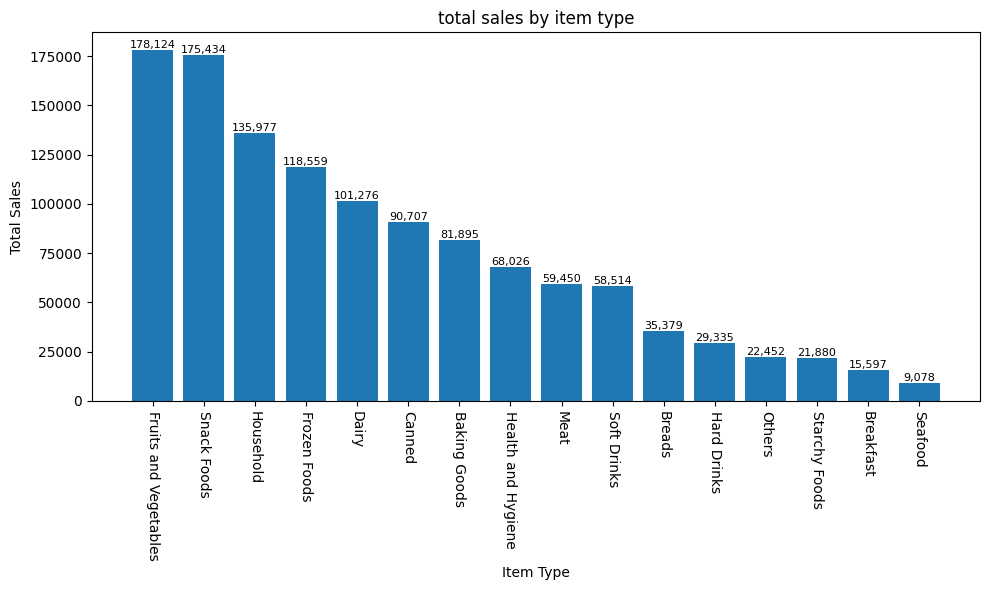

In [26]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('total sales by item type')

for bar in bars:
  plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(),
           f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

Fat Content by Outlet for Total Sales

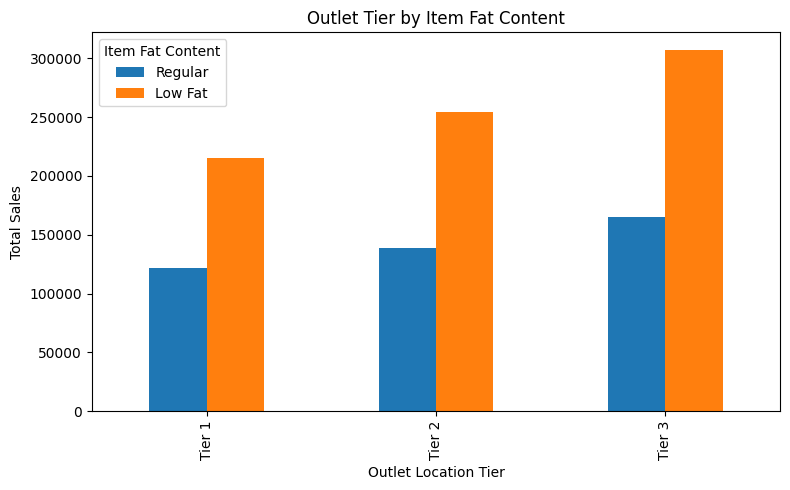

In [27]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind='bar', figsize=(8,5), title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()